In [1]:
from pscore_data_reader_preproc import read_and_process_data, model_evaluation
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in the data using the pre-processing code
x_train, y_train, x_test, y_test, train_team_values, test_team_values = read_and_process_data(
     r"E:\github_repos\Private_Projects\NCAA_FBS_AP_Ranking_Predictions\python_ap\scripts_and_data\data\score_pred_train_data.csv",
     r"E:\github_repos\Private_Projects\NCAA_FBS_AP_Ranking_Predictions\python_ap\scripts_and_data\data\score_pred_test_data.csv",
     True
)

# check to make sure the data looks right
x_train.shape
x_test.shape

train data has shape: (14648, 490)
test data has shape: (132, 490)


(132, 490)

In [9]:
# Step 1: Define and Create the parameter grid
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]  # Add this line for colsample_bytree
}

# Step 2: set up regressor
xgb_model = XGBRegressor(objective='reg:squarederror')

# Step 3: fit the grid search model
xgb_grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Use negative MSE
    n_jobs=-3,  # Use all but 2 available cores
    verbose=1
)

In [10]:
# Fit the model
xgb_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


E:\github_repos\Private_Projects\NCAA_FBS_AP_Ranking_Predictions\python_ap\venv\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-3,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

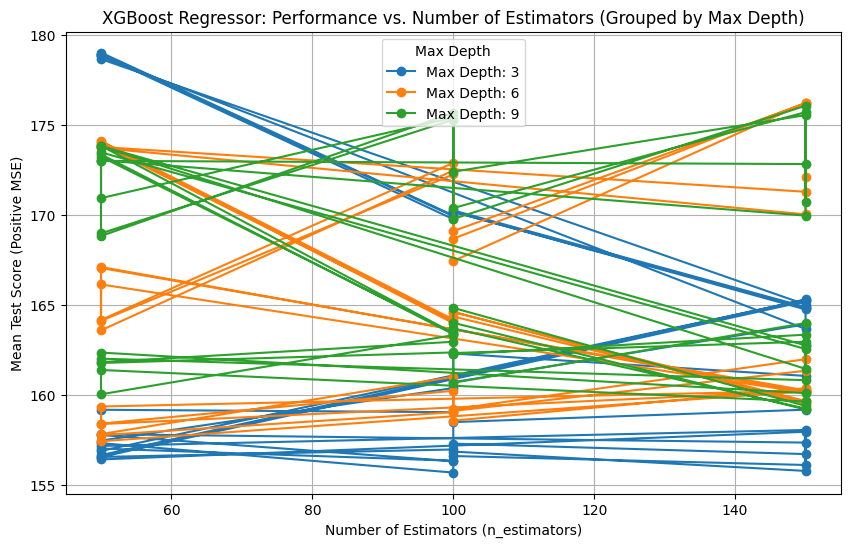

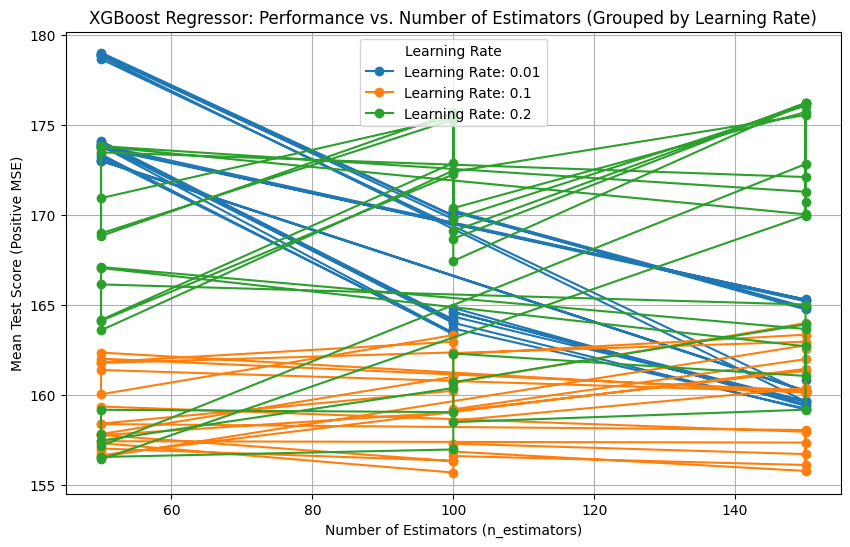

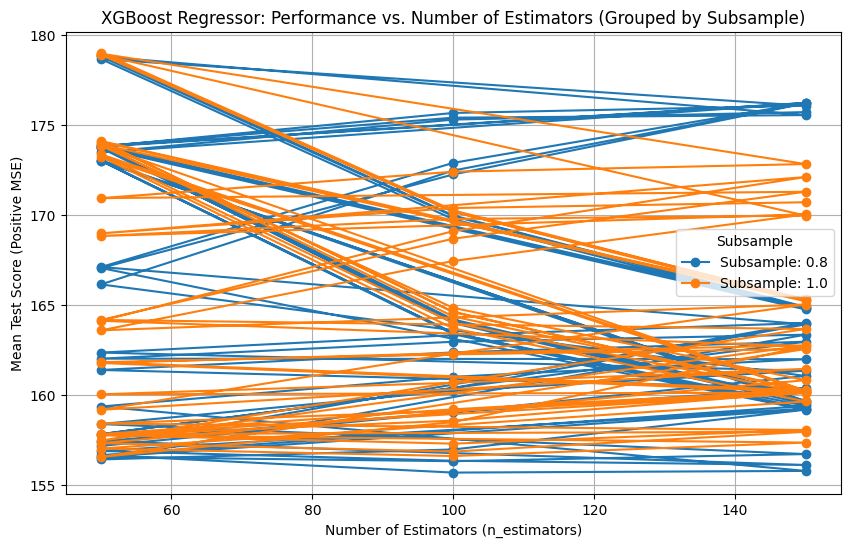

In [11]:
# Extract results from GridSearchCV
xgb_results = pd.DataFrame(xgb_grid_search.cv_results_)

# Plot performance for different max_depth grouped by n_estimators
plt.figure(figsize=(10, 6))

for max_depth in xgb_param_grid['max_depth']:  # max_depth: [3, 6, 9]
    subset = xgb_results[xgb_results['param_max_depth'] == max_depth]
    plt.plot(
        subset['param_n_estimators'], 
        -subset['mean_test_score'],  # Convert Negative MSE to Positive MSE
        marker='o', 
        label=f'Max Depth: {max_depth}'
    )

# Customize the plot
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean Test Score (Positive MSE)')
plt.title('XGBoost Regressor: Performance vs. Number of Estimators (Grouped by Max Depth)')
plt.legend(title='Max Depth')
plt.grid()
plt.show()

# Optional: Plot performance for different learning_rate values
plt.figure(figsize=(10, 6))

for learning_rate in xgb_param_grid['learning_rate']:  # learning_rate: [0.01, 0.1, 0.2]
    subset = xgb_results[xgb_results['param_learning_rate'] == learning_rate]
    plt.plot(
        subset['param_n_estimators'], 
        -subset['mean_test_score'],  # Convert Negative MSE to Positive MSE
        marker='o', 
        label=f'Learning Rate: {learning_rate}'
    )

# Customize the plot
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean Test Score (Positive MSE)')
plt.title('XGBoost Regressor: Performance vs. Number of Estimators (Grouped by Learning Rate)')
plt.legend(title='Learning Rate')
plt.grid()
plt.show()

# Optional: Plot performance for different subsample values
plt.figure(figsize=(10, 6))

for subsample in xgb_param_grid['subsample']:  # subsample: [0.8, 1.0]
    subset = xgb_results[xgb_results['param_subsample'] == subsample]
    plt.plot(
        subset['param_n_estimators'], 
        -subset['mean_test_score'],  # Convert Negative MSE to Positive MSE
        marker='o', 
        label=f'Subsample: {subsample}'
    )

# Customize the plot
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean Test Score (Positive MSE)')
plt.title('XGBoost Regressor: Performance vs. Number of Estimators (Grouped by Subsample)')
plt.legend(title='Subsample')
plt.grid()
plt.show()

In [12]:
# Get the best parameters for XGBoost
best_n_estimators_value = xgb_grid_search.best_params_.get('n_estimators', 'Not found')
best_max_depth_value = xgb_grid_search.best_params_.get('max_depth', 'Not found')
best_learning_rate_value = xgb_grid_search.best_params_.get('learning_rate', 'Not found')
best_subsample_value = xgb_grid_search.best_params_.get('subsample', 'Not found')
best_colsample_bytree_value = xgb_grid_search.best_params_.get('colsample_bytree', 'Not found')

# Print the best values
print(f"Best n_estimators: {best_n_estimators_value}")
print(f"Best max_depth: {best_max_depth_value}")
print(f"Best learning_rate: {best_learning_rate_value}")
print(f"Best subsample: {best_subsample_value}")
print(f"Best colsample_bytree: {best_colsample_bytree_value}")

Best n_estimators: 100
Best max_depth: 3
Best learning_rate: 0.1
Best subsample: 0.8
Best colsample_bytree: 1.0


In [14]:
# Fit the final XGBoost model using the best parameters
best_xgb_regressor = XGBRegressor(
    n_estimators=best_n_estimators_value,
    max_depth=best_max_depth_value,
    learning_rate=best_learning_rate_value,
    subsample=best_subsample_value,
    colsample_bytree=best_colsample_bytree_value
)

# Fit the model on the training data
best_xgb_regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [16]:
# Model evaluation
y_pred_train = best_xgb_regressor.predict(x_train)

# evaluate model
model_evaluation(y_train, y_pred_train)

R-squared: 0.302
Mean Squared Error (MSE): 136.461
Mean Absolute Error (MAE): 9.395
